In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/models")

from binary_model import binary_model
from scipy import constants

In [3]:
# check the input materials properties
binary_model?


Init signature: binary_model(D0, Q, E_seg, T, c0, d, nd, dt, nt, sublattice_fraction=1)
Docstring:      <no docstring>
Init docstring:
A class to calculate the segregation profiles as a function of time for a ternary system. 
The ternary system is represented as A-B-C, where A is solvent, B is solute #1, and C is solute #2.

...

Attributes
----------
D0: 1d array
    diffusion coefficients of solute, has the same length as the number of layers $nd$
Q: 1d array
    diffusion energy barriers of solute, has the same length as the number of layers $nd$
E_seg: 1d array
    segregation energies of solute, has the same length as the number of layers $nd$
c0: floats 
    initial solute concentrations between [0,1]

T: float
    temperature
d: float
    inter-layer distance, unit in meter
nd: int
    total number of layers 
dt: float
    time increment to simulate the segregation process, unit in second
nt: int
    number of time steps, nt*dt = total amount of time 

sublattice_fraction: float

In [4]:
# Grid and time step parameters

# 
a = 3.5e-10
d = a/np.sqrt(3)
d = d
nd = 100

# segregation parameters
T = 1173 #K

#E_seg = -0.0733 # eV/atom
#E_seg2 = -0.0408 # eV/atom

E_seg = -0.099 # eV/atom
E_seg2 = -0.076 # eV/atom

c0 = 0.15

# W
# source: Thermocalc database
# 
D0 = 6e-5 #m^2/s
Q = 292.3118 #kJ/mol

dt = 0.004  # time step size /s
nt = 10000  # number of time steps

E_seg_list = np.zeros(nd)
E_seg_list[0] = E_seg
E_seg_list[1] = E_seg2
#E_seg_list[2] = 0.25*E_seg

Q_list = np.random.normal(loc=Q,scale=5,size=nd)



In [15]:
system = binary_model(D0,
           Q_list, # 1d array, same length as nd
           E_seg_list,# 1d array, same length as nd
           T,
           c0,
           d,
           nd, # 1d array
           dt,
           nt,sublattice_fraction=0.25)

In [16]:
system.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/models/binary_model.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_layer_{i}'] = self.X_layers_vs_t.T[i]


In [17]:
# take a look at the data
system.calc_data

,time(s),x_layer_0,x_layer_1,x_layer_2,x_layer_3,x_layer_4,x_layer_5,x_layer_6,x_layer_7,x_layer_8,...,x_layer_90,x_layer_91,x_layer_92,x_layer_93,x_layer_94,x_layer_95,x_layer_96,x_layer_97,x_layer_98,x_layer_99
0,0.000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.15
1,0.004,0.150731,0.154414,0.144855,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.15
2,0.008,0.151653,0.157509,0.141565,0.149273,0.150000,0.150000,0.150000,0.150000,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.15
3,0.012,0.152687,0.159747,0.139383,0.148246,0.149937,0.150000,0.150000,0.150000,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.15
4,0.016,0.153782,0.161410,0.137879,0.147139,0.149795,0.149995,0.150000,0.150000,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,39.984,0.198965,0.189102,0.148543,0.148545,0.148548,0.148552,0.148555,0.148557,0.148562,...,0.149846,0.149863,0.149889,0.149899,0.149912,0.149922,0.149932,0.149945,0.149976,0.15
9997,39.988,0.198965,0.189102,0.148543,0.148545,0.148548,0.148552,0.148555,0.148557,0.148562,...,0.149846,0.149863,0.149889,0.149899,0.149912,0.149922,0.149932,0.149945,0.149976,0.15
9998,39.992,0.198965,0.189102,0.148543,0.148545,0.148548,0.148552,0.148555,0.148557,0.148562,...,0.149846,0.149863,0.149889,0.149899,0.149912,0.149922,0.149932,0.149945,0.149976,0.15
9999,39.996,0.198965,0.189103,0.148543,0.148545,0.148548,0.148552,0.148555,0.148557,0.148562,...,0.149846,0.149863,0.149889,0.149899,0.149912,0.149922,0.149932,0.149945,0.149976,0.15


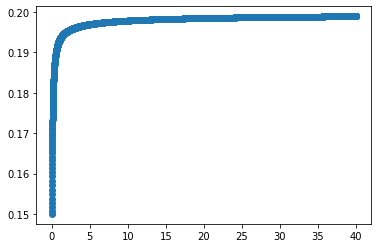

In [18]:
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_layer_0'])

<Figure size 432x288 with 0 Axes>

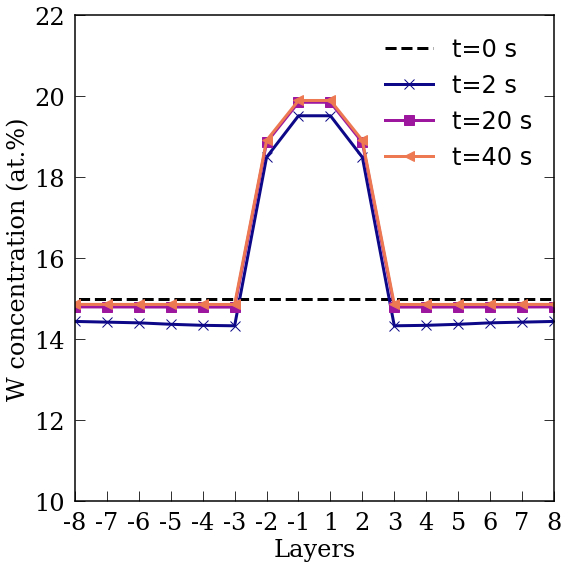

In [20]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-7.5,7.5)
ax1.set_ylim(10,22)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=4)
                  
markers = ['x','s','<','o','d','>','v']

m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_vs_t[i][::-1],system.X_layers_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(system.t[i]))} s')
    #m_i +=1 
    
    
for i in [500,5000,10000]:
    X_of_layers = np.hstack([system.X_layers_vs_t[i][::-1],system.X_layers_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(system.t[i]))} s')
    m_i +=1 

#ax1.plot(dx,seg_profile)    
    
ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])
ax1.set_xticklabels([x for x in np.arange(-8,9) if x!=0],fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('Layers',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('W concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
